In [48]:
import pandas as pd

# Assuming your data is saved in a CSV file or loaded directly
data = pd.read_csv('emergency cases in RCHSP 2023.csv')

# Convert date-time columns to datetime objects for easier manipulation
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'])
data['Discharge Time'] = pd.to_datetime(data['Discharge Time'])

In [49]:
data.head()

,ROWNUM,Hospital,Eligibility Class,Gender,Arrival Time,Severity Level,Deparment,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes)
0,1,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-13 13:17:48,Level Ⅳ,Emergency Medicine,"Pain, unspecified",2023-12-13 16:43:00,14.0,205
1,2,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-08 10:59:28,Level Ⅲ,Emergency Medicine,Low back pain,2023-12-08 12:50:00,7.0,111
2,3,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-11-05 14:03:02,Level Ⅲ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-11-05 14:54:00,24.0,51
3,4,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-07 22:57:41,Level Ⅲ,Emergency Medicine,Epistaxis,2023-10-08 00:09:00,NaN,71
4,5,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-21 21:32:17,Level Ⅳ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-10-21 23:10:00,56.0,98


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97096 entries, 0 to 97095
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ROWNUM                    97096 non-null  object        
 1   Hospital                  97096 non-null  object        
 2   Eligibility Class         97055 non-null  object        
 3   Gender                    97096 non-null  object        
 4   Arrival Time              97096 non-null  datetime64[ns]
 5   Severity Level            95130 non-null  object        
 6   Deparment                 97096 non-null  object        
 7   Main Diagnosis            93826 non-null  object        
 8   Discharge Time            97087 non-null  datetime64[ns]
 9   Waiting Time (Minutes)    92419 non-null  float64       
 10  Length of Stay (Minutes)  97087 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 8.1+ MB


In [51]:
# Display the number of unique values for each column
unique_values = data.nunique()

# Print the result
print(unique_values)

ROWNUM                      97096
Hospital                        1
Eligibility Class               4
Gender                          2
Arrival Time                97081
Severity Level                  5
Deparment                       1
Main Diagnosis               1784
Discharge Time              86552
Waiting Time (Minutes)        224
Length of Stay (Minutes)      825
dtype: int64


Summary of Unique Values in Each Column: 

<dd>1- ROWNUM: 97,096 (This likely represents the total number of records in the dataset)</dd>
<dd>2- Hospital: 1 (All records belong to a single hospital, "Royal Commission Health Services Program.")</dd>
<dd>3- Eligibility Class: 4 (There are four different eligibility classes for patients.)</dd>
<dd>4- Gender: 2 (The dataset contains two genders, likely "Male" and "Female.")</dd>
<dd>5- Arrival Time: 97,081 (Indicates that some patients may have arrived at the same time, as there are only 15 unique timestamps.)</dd>
<dd>6- Severity Level: 5 (There are five different severity levels, likely ranging from Level I to Level V.)</dd>
<dd>7- Deparment: 1 (All patients are admitted to "Emergency Medicine," indicating a focus on a specific area of care.)</dd>
<dd>8- Main Diagnosis: 1,784 (A diverse range of diagnoses, with a large number indicating complexity in patient conditions.)</dd>
<dd>9- Discharge Time: 86,552 (Similar to Arrival Time, indicating that many patients were discharged at the same times.)</dd>
<dd>10- Waiting Time (Minutes): 224 (Shows some variability in waiting times, but many are likely similar, given the range.)</dd>
<dd>11- Length of Stay (Minutes): 825 (Indicates that patients have varied lengths of stay in the hospital.)</dd>

Given that both Hospital and Department columns contain only one unique value, and ROWNUM serves as an index, we should drop all three columns to streamline your dataset and focus on the features that contribute meaningfully to your analysis.

In [58]:
# Dropping unnecessary columns
data = data.drop(columns=['ROWNUM', 'Hospital', 'Deparment'])

# Verify the changes
print(data.head())


  Eligibility Class  Gender        Arrival Time Severity Level  \
0  ROYAL COMMISSION  Female 2023-12-13 13:17:48        Level Ⅳ   
1  ROYAL COMMISSION  Female 2023-12-08 10:59:28        Level Ⅲ   
2  ROYAL COMMISSION  Female 2023-11-05 14:03:02        Level Ⅲ   
3  ROYAL COMMISSION  Female 2023-10-07 22:57:41        Level Ⅲ   
4  ROYAL COMMISSION  Female 2023-10-21 21:32:17        Level Ⅳ   

                                   Main Diagnosis      Discharge Time  \
0                               Pain, unspecified 2023-12-13 16:43:00   
1                                   Low back pain 2023-12-08 12:50:00   
2  Acute upper respiratory infection, unspecified 2023-11-05 14:54:00   
3                                       Epistaxis 2023-10-08 00:09:00   
4  Acute upper respiratory infection, unspecified 2023-10-21 23:10:00   

   Waiting Time (Minutes) Length of Stay (Minutes)  
0                    14.0                      205  
1                     7.0                      111  
2    

In [60]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Display the result
print(null_values[null_values > 0])  # This will only show columns with null values


Eligibility Class             41
Severity Level              1966
Main Diagnosis              3270
Discharge Time                 9
Waiting Time (Minutes)      4677
Length of Stay (Minutes)       9
dtype: int64


In [62]:
# Drop rows with missing values
data.dropna(inplace=True)

# Verify the changes
print(f"Total rows after dropping missing rows: {data.shape[0]}")


Total rows after dropping missing rows: 91104


In [64]:
import pandas as pd

# Assuming df is your DataFrame

# Convert Arrival Time and Discharge Time to datetime
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'])
data['Discharge Time'] = pd.to_datetime(data['Discharge Time'], errors='coerce')

# Feature 1: Arrival Date
data['Arrival Date'] = data['Arrival Time'].dt.date

# Feature 2: Arrival Hour
data['Arrival Hour'] = data['Arrival Time'].dt.hour

# Feature 3: Day of the Week
data['Day of Week'] = data['Arrival Time'].dt.day_name()

# Feature 4: Is Weekend
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x in ['Saturday', 'Friday'] else 0)



# Feature 6: Time of Day
def time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['Time of Day'] = data['Arrival Hour'].apply(time_of_day)

# Display the first few rows with the new features
print(data[['Arrival Time', 'Arrival Date', 'Arrival Hour', 'Day of Week', 'Is Weekend', 'Time of Day']].head())


         Arrival Time Arrival Date  Arrival Hour Day of Week  Is Weekend  \
0 2023-12-13 13:17:48   2023-12-13            13   Wednesday           0   
1 2023-12-08 10:59:28   2023-12-08            10      Friday           1   
2 2023-11-05 14:03:02   2023-11-05            14      Sunday           0   
4 2023-10-21 21:32:17   2023-10-21            21    Saturday           1   
5 2023-12-07 18:41:53   2023-12-07            18    Thursday           0   

  Time of Day  
0   Afternoon  
1     Morning  
2   Afternoon  
4     Evening  
5     Evening  


In [19]:
# Sort DataFrame by Arrival Time
data = data.sort_values('Arrival Time')

# Initialize a list to store the count of admitted patients
admitted_patients = []

# Loop through each row to calculate current admitted patients
for index, row in data.iterrows():
    # Count how many patients are currently admitted
    count = data[(data['Arrival Time'] <= row['Arrival Time']) & 
                 (data['Discharge Time'] >= row['Arrival Time'])].shape[0]
    admitted_patients.append(count)

# Add the new column to the DataFrame
data['Currently Admitted Patients'] = admitted_patients

# Display the DataFrame with the new column
print(data[['Arrival Time', 'Discharge Time', 'Currently Admitted Patients']])

             Arrival Time      Discharge Time  Currently Admitted Patients
23956 2023-01-01 00:05:24 2023-01-01 01:08:00                            1
29337 2023-01-01 00:05:55 2023-01-01 01:10:00                            2
65121 2023-01-01 00:07:03 2023-01-01 01:20:00                            3
83044 2023-01-01 00:12:54 2023-01-01 01:11:00                            4
64285 2023-01-01 00:19:13 2023-01-01 01:13:00                            5
...                   ...                 ...                          ...
95563 2023-12-31 23:45:51 2024-01-01 00:41:00                           31
54606 2023-12-31 23:48:46 2024-01-01 03:49:46                           32
80283 2023-12-31 23:53:53 2024-01-01 01:15:00                           32
17027 2023-12-31 23:54:15 2024-01-01 00:29:00                           33
26380 2023-12-31 23:56:09 2024-01-01 00:29:00                           30

[91104 rows x 3 columns]


In [20]:

data.head()

,Eligibility Class,Gender,Arrival Time,Severity Level,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes),Arrival Date,Arrival Hour,Day of Week,Is Weekend,Time of Day,Currently Admitted Patients
23956,EXEMPT,Female,2023-01-01 00:05:24,Level Ⅳ,"Acute upper respiratory infection, unspecified",2023-01-01 01:08:00,34.0,63,2023-01-01,0,Sunday,0,Night,1
29337,EXEMPT,Female,2023-01-01 00:05:55,Level Ⅳ,"Acute upper respiratory infection, unspecified",2023-01-01 01:10:00,46.0,64,2023-01-01,0,Sunday,0,Night,2
65121,ROYAL COMMISSION,Female,2023-01-01 00:07:03,Level Ⅳ,Headache,2023-01-01 01:20:00,59.0,73,2023-01-01,0,Sunday,0,Night,3
83044,EXEMPT,Male,2023-01-01 00:12:54,Level Ⅳ,Acute nasopharyngitis [common cold],2023-01-01 01:11:00,37.0,58,2023-01-01,0,Sunday,0,Night,4
64285,EXEMPT,Female,2023-01-01 00:19:13,Level Ⅳ,"Acute upper respiratory infection, unspecified",2023-01-01 01:13:00,33.0,54,2023-01-01,0,Sunday,0,Night,5


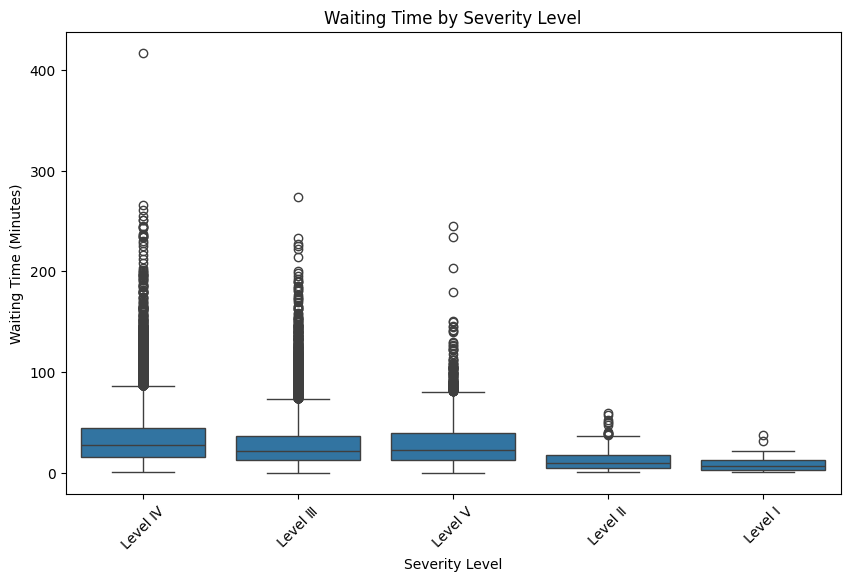

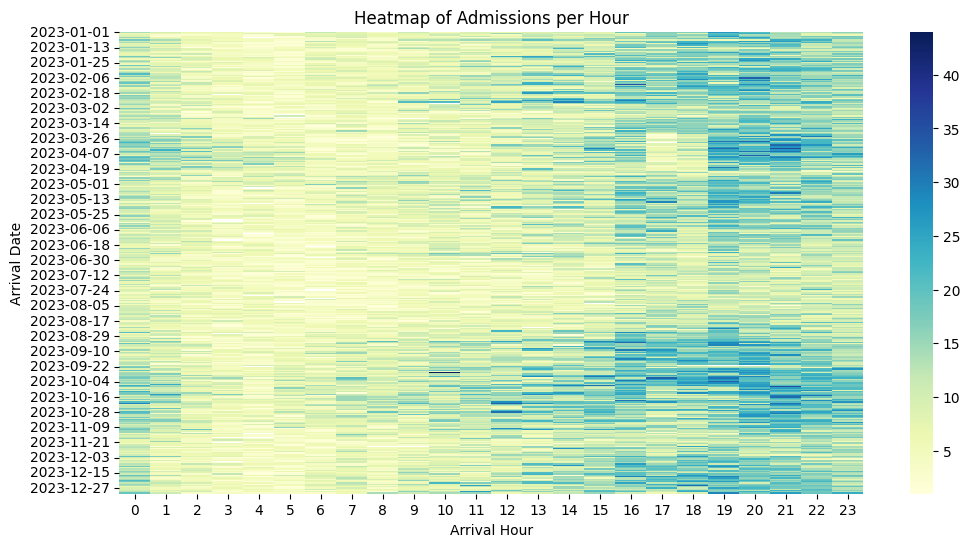

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Waiting Time by Severity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity Level', y='Waiting Time (Minutes)', data=data)
plt.title('Waiting Time by Severity Level')
plt.xticks(rotation=45)
plt.show()

# Heatmap for Admissions
admissions_per_hour = data.groupby(['Arrival Date', 'Arrival Hour']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(admissions_per_hour, cmap='YlGnBu')
plt.title('Heatmap of Admissions per Hour')
plt.ylabel('Arrival Date')
plt.xlabel('Arrival Hour')
plt.show()


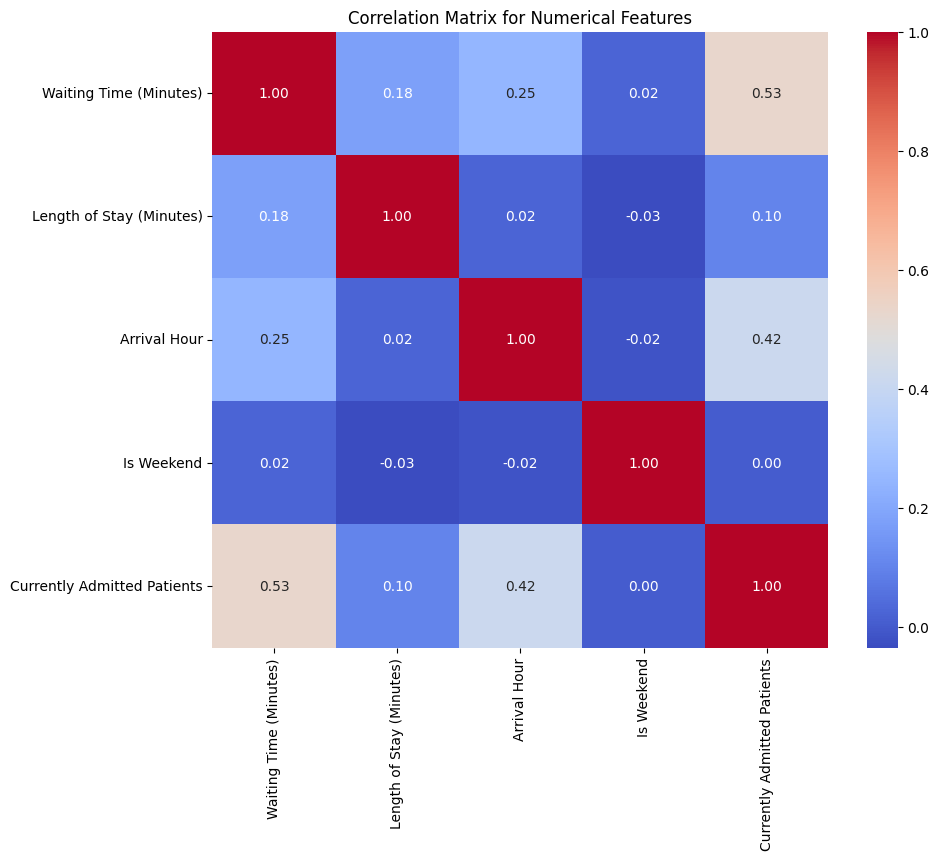

In [22]:
# Step 1: Select only numerical columns
# Convert 'Length of Stay (Minutes)' to numeric, forcing errors to NaN
data['Length of Stay (Minutes)'] = pd.to_numeric(data['Length of Stay (Minutes)'], errors='coerce')

numerical_data = data.select_dtypes(include=['float64', 'int64','int32'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [23]:
# Check the data types of the columns
print(data.dtypes)

Eligibility Class                      object
Gender                                 object
Arrival Time                   datetime64[ns]
Severity Level                         object
Main Diagnosis                         object
Discharge Time                 datetime64[ns]
Waiting Time (Minutes)                float64
Length of Stay (Minutes)              float64
Arrival Date                           object
Arrival Hour                            int32
Day of Week                            object
Is Weekend                              int64
Time of Day                            object
Currently Admitted Patients             int64
dtype: object


Severity Level
Level Ⅰ     9.807692
Level Ⅱ    12.615556
Level Ⅲ    28.164846
Level Ⅳ    33.308557
Level Ⅴ    29.573059
Name: Waiting Time (Minutes), dtype: float64


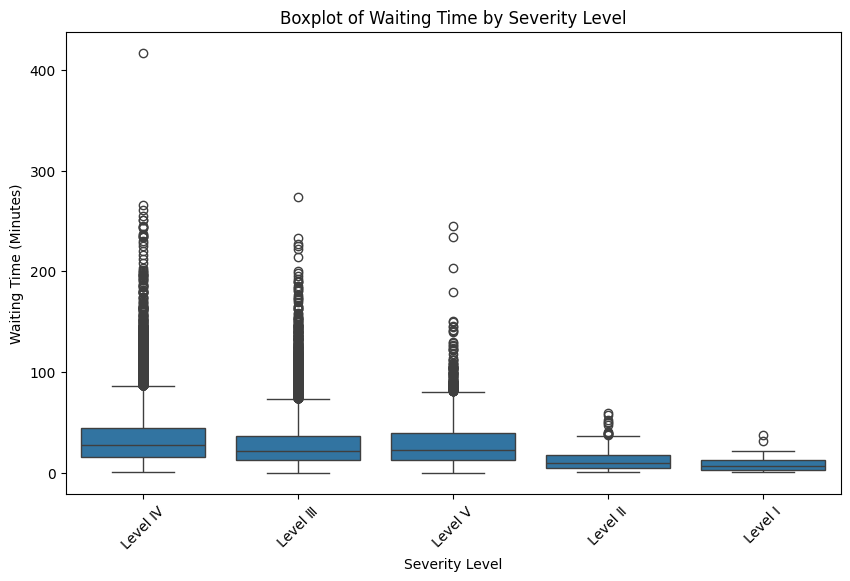

Day of Week
Friday       31.352816
Monday       31.726773
Saturday     33.481915
Sunday       33.522744
Thursday     29.571112
Tuesday      30.315349
Wednesday    31.397505
Name: Waiting Time (Minutes), dtype: float64


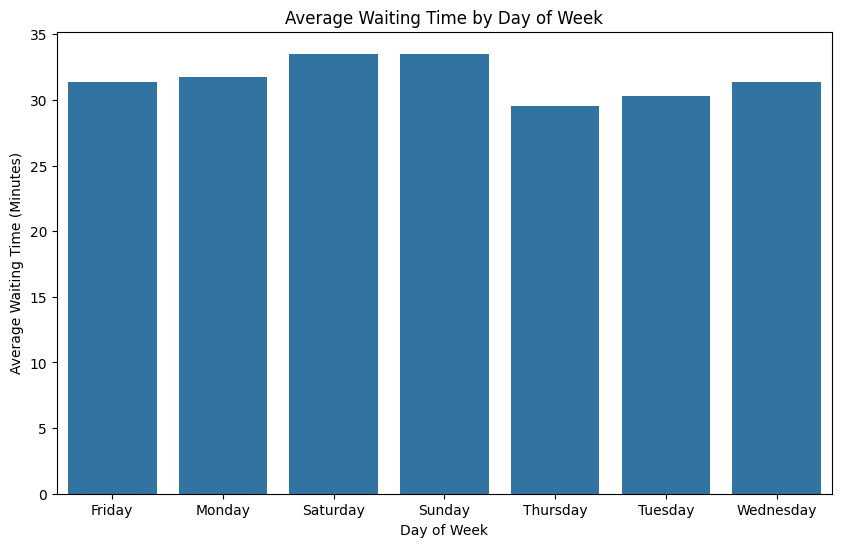

In [24]:
# Average Waiting Time by Severity Level
avg_waiting_severity = data.groupby('Severity Level')['Waiting Time (Minutes)'].mean()
print(avg_waiting_severity)

# Boxplot for Waiting Time by Severity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity Level', y='Waiting Time (Minutes)', data=data)
plt.title('Boxplot of Waiting Time by Severity Level')
plt.xticks(rotation=45)
plt.show()

# Average Waiting Time by Day of Week
avg_waiting_day = data.groupby('Day of Week')['Waiting Time (Minutes)'].mean()
print(avg_waiting_day)

# Bar plot for average waiting time by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_waiting_day.index, y=avg_waiting_day.values)
plt.title('Average Waiting Time by Day of Week')
plt.ylabel('Average Waiting Time (Minutes)')
plt.xlabel('Day of Week')
plt.show()


Time of Day
Afternoon    33.642597
Evening      38.194729
Morning      21.346171
Night        25.204577
Name: Waiting Time (Minutes), dtype: float64


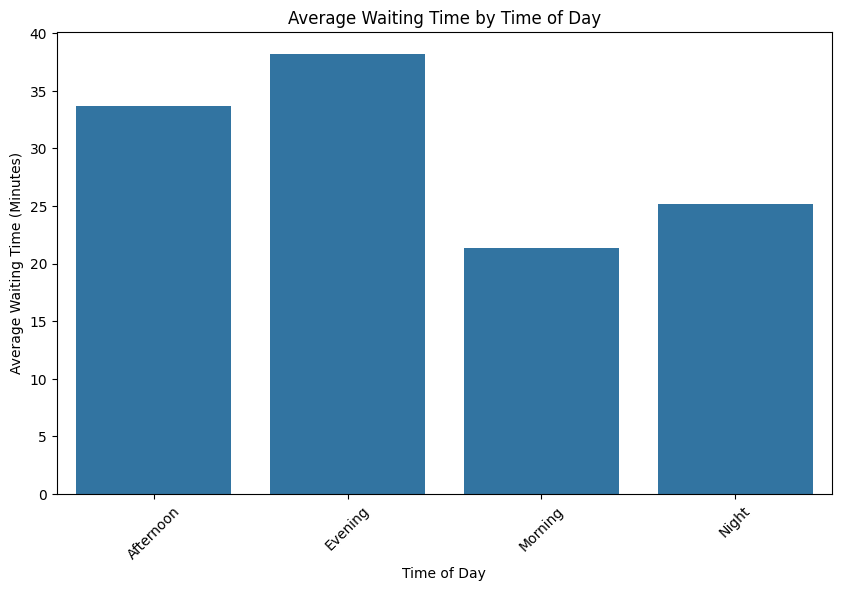

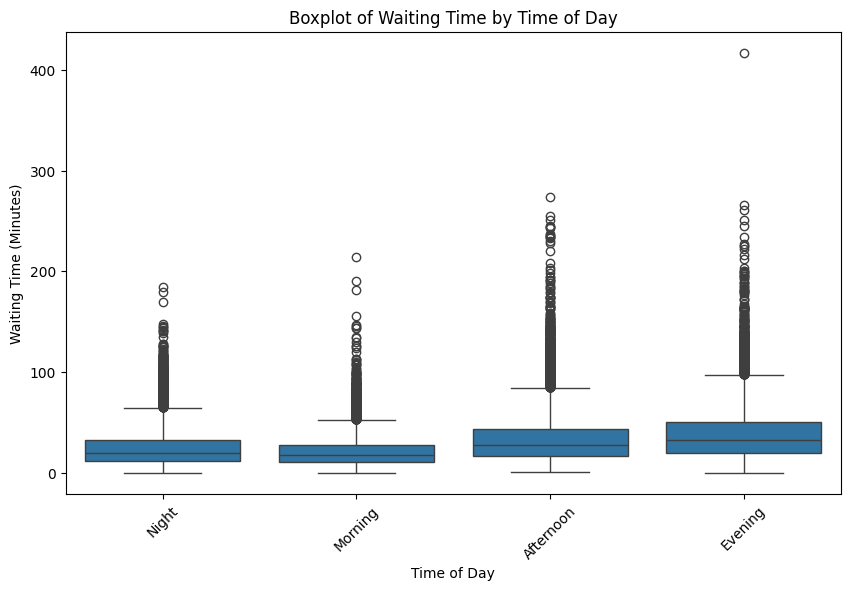

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# data = pd.read_csv('your_data.csv') # Load your dataset

# Average Waiting Time by Time of Day
avg_waiting_time_by_time_of_day = data.groupby('Time of Day')['Waiting Time (Minutes)'].mean()
print(avg_waiting_time_by_time_of_day)

# Bar plot for average waiting time by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_waiting_time_by_time_of_day.index, y=avg_waiting_time_by_time_of_day.values)
plt.title('Average Waiting Time by Time of Day')
plt.ylabel('Average Waiting Time (Minutes)')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Waiting Time by Time of Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time of Day', y='Waiting Time (Minutes)', data=data)
plt.title('Boxplot of Waiting Time by Time of Day')
plt.xticks(rotation=45)
plt.show()


In [28]:
from gensim.models import Word2Vec
import numpy as np

# Preprocessing: Tokenize and prepare sentences
data['Main Diagnosis'] = data['Main Diagnosis'].str.lower()  # Lowercase
data['Main Diagnosis'] = data['Main Diagnosis'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
sentences = data['Main Diagnosis'].str.split().tolist()  # Tokenize

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Create embeddings for each diagnosis
def get_embedding(diagnosis):
    words = diagnosis.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]  # Get word vectors
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)  # Return mean vector

data['Diagnosis Embedding'] = data['Main Diagnosis'].apply(get_embedding)

# Print the resulting DataFrame
print(data[['Main Diagnosis', 'Diagnosis Embedding']].head())

                                      Main Diagnosis  \
23956  acute upper respiratory infection unspecified   
29337  acute upper respiratory infection unspecified   
65121                                       headache   
83044              acute nasopharyngitis common cold   
64285  acute upper respiratory infection unspecified   

                                     Diagnosis Embedding  
23956  [-0.24207994, 0.56218296, -0.86105764, 0.27244...  
29337  [-0.24207994, 0.56218296, -0.86105764, 0.27244...  
65121  [0.008868652, -0.15832055, 0.11105883, -0.1977...  
83044  [-0.8549403, 0.19438459, 0.45620075, 0.0979190...  
64285  [-0.24207994, 0.56218296, -0.86105764, 0.27244...  


In [34]:
# Convert each embedding to a tuple and then find unique values
unique_embeddings = data['Diagnosis Embedding'].apply(tuple).nunique()

print(f"Number of unique diagnosis embeddings: {unique_embeddings}")

Number of unique diagnosis embeddings: 1769


In [36]:
unique_diagnosis = data['Main Diagnosis'].unique()

In [38]:
unique_diagnosis

array(['acute upper respiratory infection unspecified', 'headache',
       'acute nasopharyngitis common cold', ..., 'diplopia',
       'other specified anxiety disorders', 'cataract unspecified'],
      dtype=object)

In [40]:
print(unique_diagnosis)

['acute upper respiratory infection unspecified' 'headache'
 'acute nasopharyngitis common cold' ... 'diplopia'
 'other specified anxiety disorders' 'cataract unspecified']


In [46]:
# Save the DataFrame to a CSV file
df = pd.DataFrame(unique_diagnosis)
df.to_csv('unique_diagnosis.csv', index=False)